In [3]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pprint import pprint
import os

In [4]:
#extract data from csv file  
data_path= "TMEC trade Ag.csv"
trade_data = pd.read_csv(data_path)
# convert data to data frame in order to work with it
trade_df=pd.DataFrame(trade_data)
#remove empty columns
tmec=trade_df.drop(['Unnamed: 65', 'Unnamed: 66'],axis=1)
#filtare for exports
exp_df=tmec.loc[tmec['Trade flow']=='Exports',:].reset_index(drop=True)


## Exports analysis

In [5]:
exports={'Mexico':['Canada', 'USA'], 
         'Canada':['Mexico', 'USA'], 
         'USA':['Mexico', 'Canada']}

export_df={'Mexico_Canada' : ['x'],
            'Mexico_USA' : ['x'],
            'Canada_Mexico' : ['x'],
            'Canada_USA' : ['x'],
            'USA_Mexico' : ['x'],
            'USA_Canada' : ['x']}
e_list=['Mexico_Canada','Mexico_USA', 'Canada_Mexico', 'Canada_USA',
       'USA_Mexico', 'USA_Canada']
# for export in exports:
#     for x in range(2):
#          print(f"'{export}_{exports[export][x]}' : [''],")

    

In [6]:
idx= (-1)
for export in exports:
    for  x in range(2):
        idx += 1
        export_df[e_list[idx]][0]=exp_df.loc[(exp_df['Reporter']== export) & (exp_df['Partner']== exports[export][x]),:].transpose(copy=True)

        (n1,n2,n3,n4,n5) =export_df[e_list[idx]][0].iloc[2,:]
        col_names=[n1,n2,n3,n4,n5]
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0][5:]

        #remove commas "," from string values in order tho convert string values into numeric values
        export_df[e_list[idx]][0].replace(',','', regex=True, inplace=True)

        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].fillna(0)
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].astype(float)
        export_df[e_list[idx]][0].columns = col_names
        export_df[e_list[idx]][0].reset_index(inplace=True)
        export_df[e_list[idx]][0]=export_df[e_list[idx]][0].drop(['TOTAL Total of all HS commodities'],axis=1)
        print(f'{idx} report: {export}  Partner: {exports[export][x]} -- ok')

0 report: Mexico  Partner: Canada -- ok
1 report: Mexico  Partner: USA -- ok
2 report: Canada  Partner: Mexico -- ok
3 report: Canada  Partner: USA -- ok
4 report: USA  Partner: Mexico -- ok
5 report: USA  Partner: Canada -- ok


## Plots

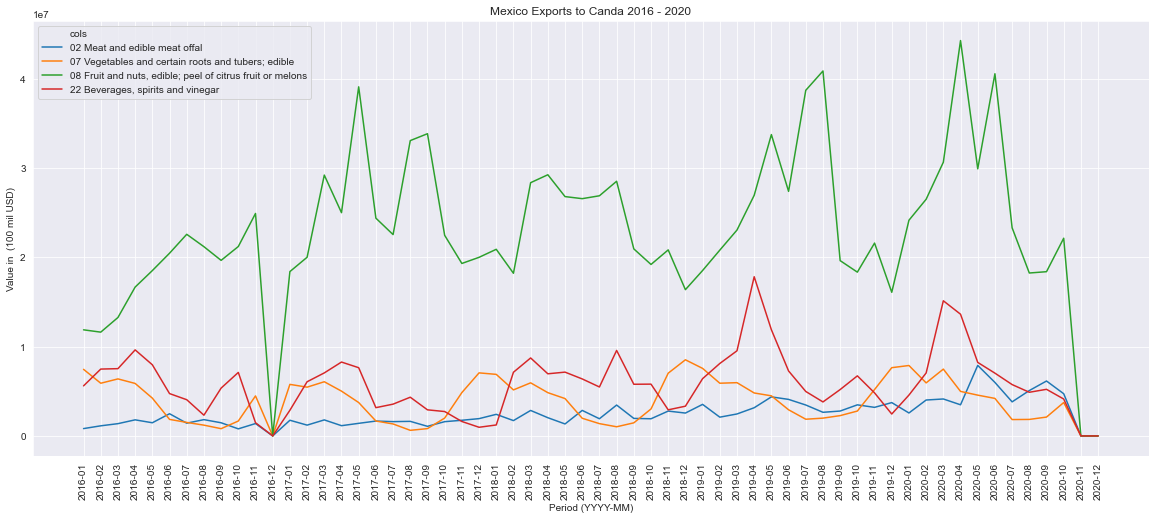

In [13]:
plot_can_mex_df =export_df['Mexico_Canada'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
can_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_mex_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Mexico Exports to Canda 2016 - 2020")
# plt.ylim(top=300000000)
plt.show()

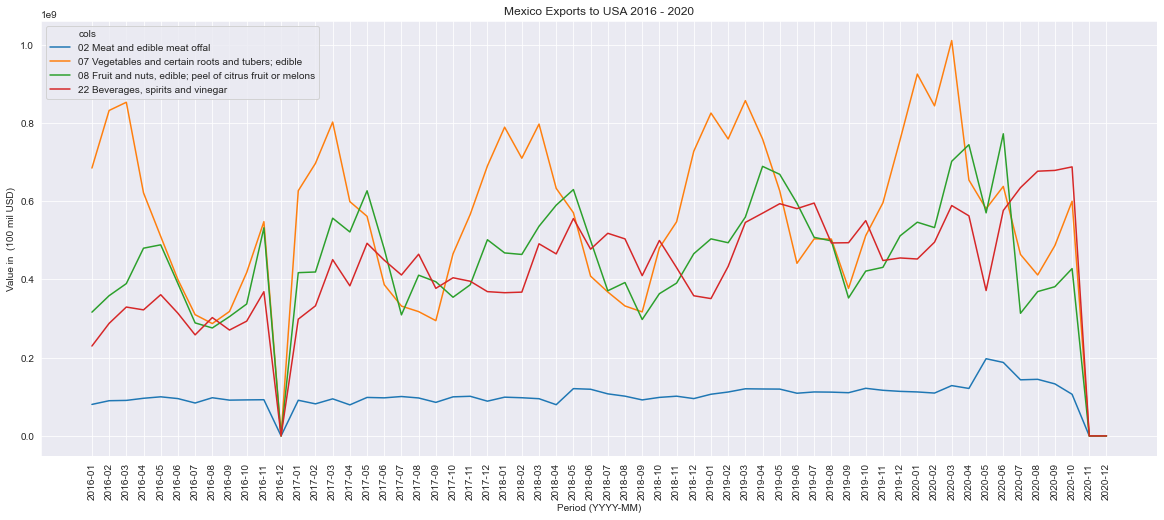

In [8]:
plot_mex_usa_df =export_df['Mexico_USA'][0].melt( 'index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
mex_usa = sns.lineplot(x= 'index', y="vals", hue='cols', data=plot_mex_usa_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Mexico Exports to USA 2016 - 2020")
plt.show()

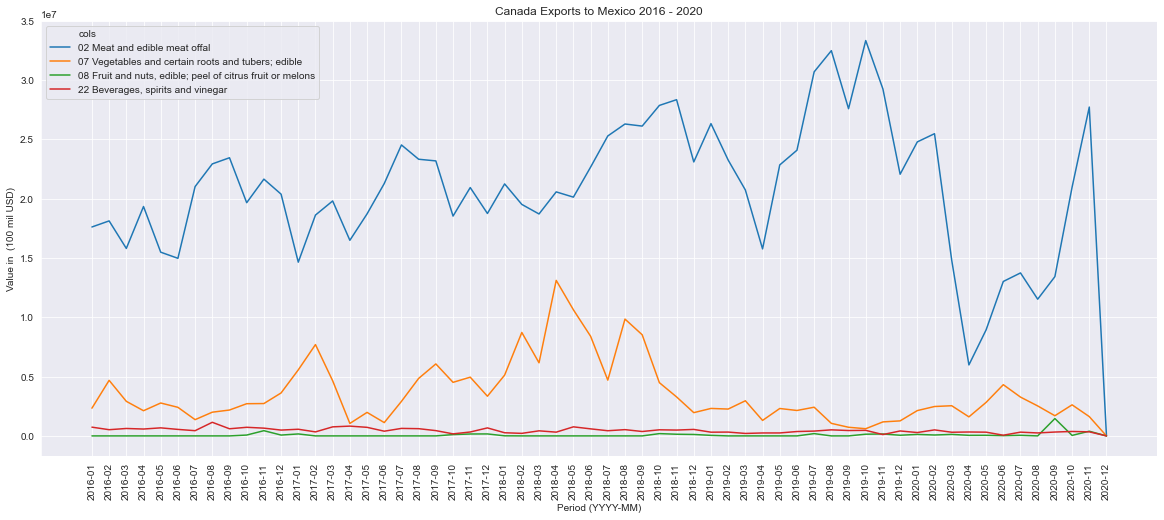

In [14]:
plot_can_mex_df =export_df['Canada_Mexico'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
can_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_mex_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Canada Exports to Mexico 2016 - 2020")
#plt.ylim(top=300000000)
plt.show()

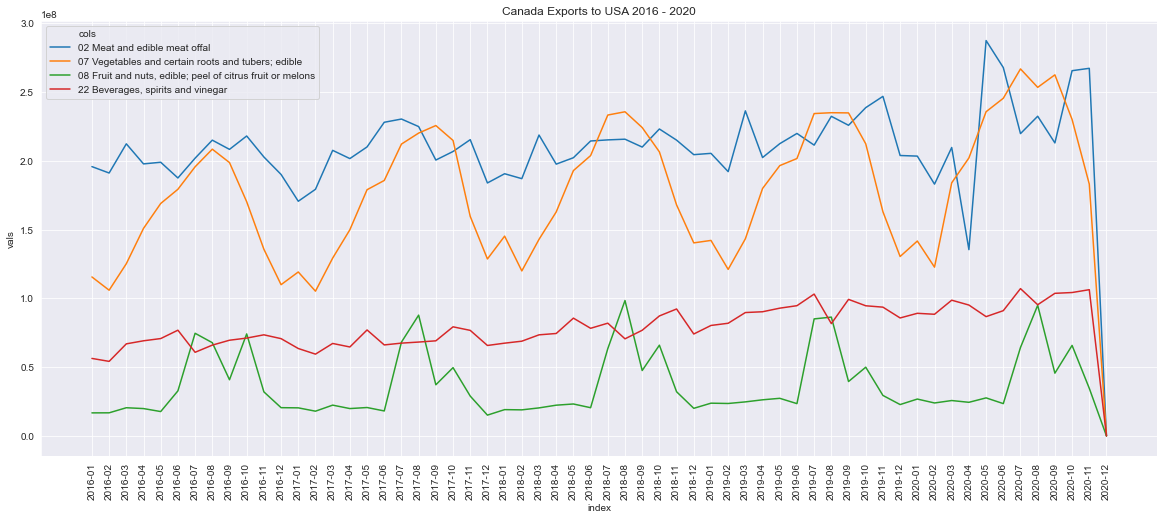

In [15]:
plot_can_usa_df =export_df['Canada_USA'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"Canada Exports to USA 2016 - 2020")
can_usa = sns.lineplot(x="index", y="vals", hue='cols', data=plot_can_usa_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')

#plt.ylim(top=300000000)
plt.show()

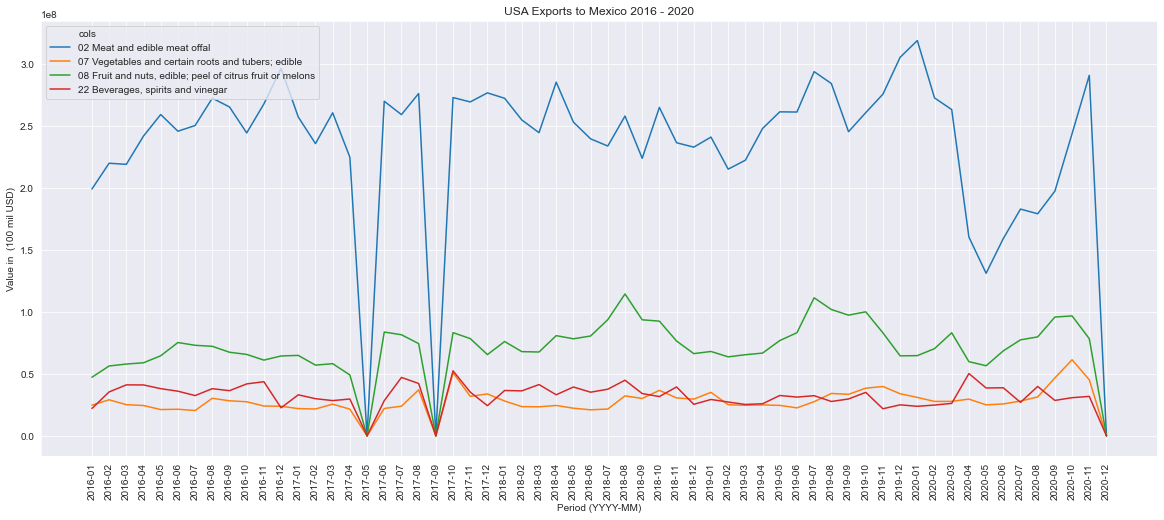

In [16]:
plot_usa_mex_df =export_df['USA_Mexico'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
usa_mex = sns.lineplot(x="index", y="vals", hue='cols', data=plot_usa_mex_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"USA Exports to Mexico 2016 - 2020")
#plt.ylim(top=300000000)
plt.show()

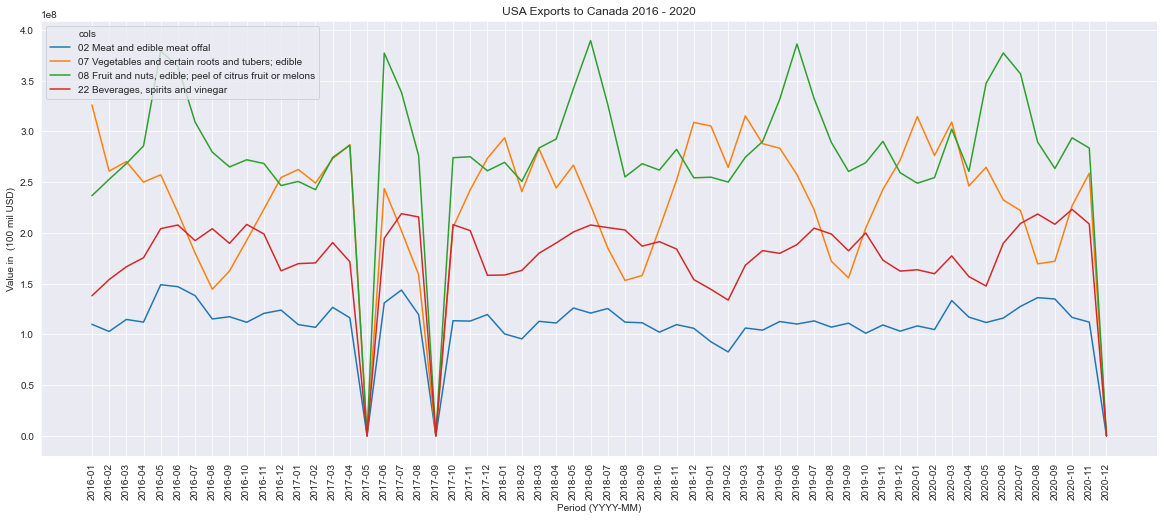

In [12]:
plot_usa_can_df =export_df['USA_Canada'][0].melt('index', var_name='cols',  value_name='vals')
plt.figure(figsize=(20, 8))
sns.set_style("darkgrid")
usa_can = sns.lineplot(x="index", y="vals", hue='cols', data=plot_usa_can_df)
plt.legend(loc='upper left')
plt.xticks(rotation='vertical')
plt.ylabel('Value in  (100 mil USD)')
plt.xlabel('Period (YYYY-MM)')
plt.title(f"USA Exports to Canada 2016 - 2020")
#plt.ylim(top=300000000)
plt.show()